In [101]:
from hstrader import HsTrader
from hstrader.models import Resolution
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

In [102]:
# Load environment variables from a .env file
load_dotenv()

# Get the CLIENT_ID from the environment variables
id = os.getenv('CLIENT_ID')

# Get the CLIENT_SECRET from the environment variables
secret = os.getenv('CLIENT_SECRET')

# Initialize the HsTrader client with the client ID and secret
client = HsTrader(id, secret)

Percentage level	 Price
0.00%		 1.096
23.6		 1.093
38.2%		 1.091
50%		 1.09
61.8%		 1.088
100.00%		 1.084


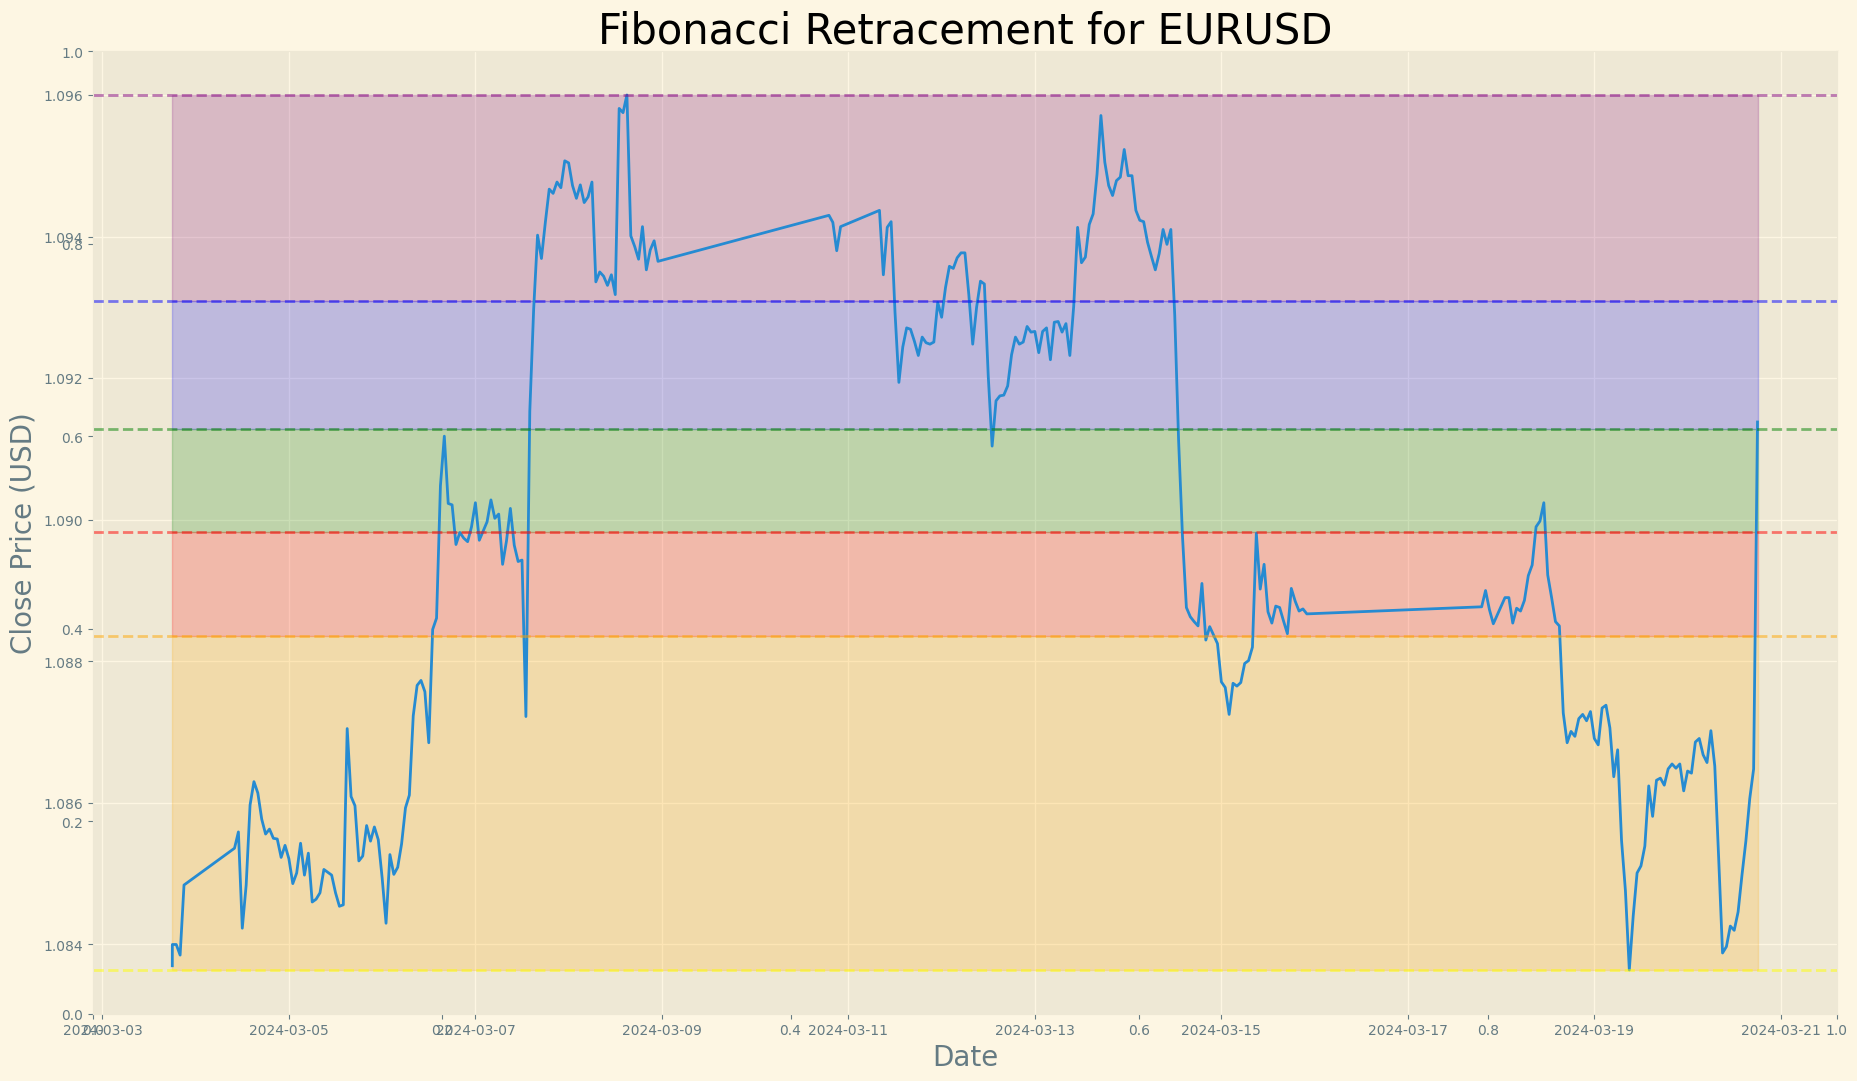

In [103]:
def fib_retrace(ticker):
  
  symbol=client.get_symbol(ticker)
  data=client.get_market_history(symbol=symbol.id,resolution=Resolution.H1)

  # Create a DataFrame from the retrieved data
  df=pd.DataFrame([bar.model_dump() for bar in data])
  df.set_index('time',inplace=True)
  # Fibonacci constants
  max_value = df['close'].max()
  min_value = df['close'].min()
  difference = max_value - min_value

  # Set Fibonacci levels
  first_level = max_value - difference * 0.236
  second_level = max_value - difference * 0.382
  third_level = max_value - difference * 0.5
  fourth_level = max_value - difference * 0.618

  # Print levels
  print('Percentage level\t Price')
  print('0.00%\t\t', round(max_value, 3))
  print('23.6\t\t', round(first_level, 3))
  print('38.2%\t\t', round(second_level, 3))
  print('50%\t\t', round(third_level, 3))
  print('61.8%\t\t', round(fourth_level, 3))
  print('100.00%\t\t', round(min_value, 3))

  # Plot Fibonacci graph
  plot_title = 'Fibonacci Retracement for ' + ticker
  fig = plt.figure(figsize=(22.5, 12.5))
  plt.title(plot_title, fontsize=30)
  ax = fig.add_subplot(111)
  plt.plot(df.index, df['close'])
  plt.axhline(max_value, linestyle='--', alpha=0.5, color='purple')
  ax.fill_between(df.index, max_value, first_level, color='purple', alpha=0.2)

  # Fill sections
  plt.axhline(first_level, linestyle='--', alpha=0.5, color='blue')
  ax.fill_between(df.index, first_level, second_level, color='blue', alpha=0.2)

  plt.axhline(second_level, linestyle='--', alpha=0.5, color='green')
  ax.fill_between(df.index, second_level, third_level, color='green', alpha=0.2)

  plt.axhline(third_level, linestyle='--', alpha=0.5, color='red')
  ax.fill_between(df.index, third_level, fourth_level, color='red', alpha=0.2)

  plt.axhline(fourth_level, linestyle='--', alpha=0.5, color='orange')
  ax.fill_between(df.index, fourth_level, min_value, color='orange', alpha=0.2)

  plt.axhline(min_value, linestyle='--', alpha=0.5, color='yellow')
  plt.xlabel('Date', fontsize=20)
  plt.ylabel('Close Price (USD)', fontsize=20)
fib_retrace('EURUSD')

In [104]:
def fib_retrace(ticker):
    symbol = client.get_symbol(ticker)
    data = client.get_market_history(symbol=symbol.id, resolution=Resolution.H1)
    
    # Create a DataFrame from the retrieved data
    df = pd.DataFrame([bar.model_dump() for bar in data])
    df.set_index('time', inplace=True)
    
    # Fibonacci constants
    max_value = df['close'].max()
    min_value = df['close'].min()
    difference = max_value - min_value
    
    # Set Fibonacci levels
    levels = {
        '0.00%': max_value,
        '23.6%': max_value - difference * 0.236,
        '38.2%': max_value - difference * 0.382,
        '50.0%': max_value - difference * 0.5,
        '61.8%': max_value - difference * 0.618,
        '100.0%': min_value
    }
    
    # Print levels
    print('Percentage level\t Price')
    for level, price in levels.items():
        print(f'{level}\t\t {round(price, 3)}')
    
    # Create the plotly figure
    fig = go.Figure()

    # Add candlestick chart
    fig.add_trace(go.Candlestick(
        x=df.index,
        open=df['open'],
        high=df['high'],
        low=df['low'],
        close=df['close'],
        name='Candlestick'
    ))

    # Add Fibonacci levels
    for level, price in levels.items():
        fig.add_hline(y=price, line=dict(dash='dash', width=0.5), annotation_text=level, annotation_position="right")

    # Add filled sections
    colors = ['purple', 'blue', 'green', 'red', 'orange']
    level_values = list(levels.values())
    
    for i in range(len(level_values) - 1):
        fig.add_trace(go.Scatter(
            x=df.index,
            y=[level_values[i]] * len(df.index),
            fill='tozeroy' if i == 0 else 'tonexty',
            fillcolor=f'rgba({i * 50}, {100 + i * 30}, {200 - i * 30}, 0.2)',
            mode='lines',
            line=dict(width=0),
            showlegend=False
        ))

    # Update layout
    fig.update_layout(
        title=f'Fibonacci Retracement for {ticker}',
        xaxis_title='Date',
        yaxis_title='Close Price (USD)',
        xaxis_rangeslider_visible=False,
        template='plotly_white',
        yaxis=dict(
            range=[min_value, df['high'].max()])
    )

    # Show plot
    fig.show()

# Example usage
fib_retrace('EURUSD')  # Replace with the desired ticker symbol


Percentage level	 Price
0.00%		 1.096
23.6%		 1.093
38.2%		 1.091
50.0%		 1.09
61.8%		 1.088
100.0%		 1.084


In [105]:
def fib_retrace(ticker):
    symbol = client.get_symbol(ticker)
    data = client.get_market_history(symbol=symbol.id, resolution=Resolution.H1)
    
    # Create a DataFrame from the retrieved data
    df = pd.DataFrame([bar.model_dump() for bar in data])
    df.set_index('time', inplace=True)
    
    # Fibonacci constants
    max_value = df['close'].max()
    min_value = df['close'].min()
    difference = max_value - min_value
    
    # Set Fibonacci levels
    levels = {
        '0.00%': max_value,
        '23.6%': max_value - difference * 0.236,
        '38.2%': max_value - difference * 0.382,
        '50.0%': max_value - difference * 0.5,
        '61.8%': max_value - difference * 0.618,
        '100.0%': min_value
    }
    
    # Print levels
    print('Percentage level\t Price')
    for level, price in levels.items():
        print(f'{level}\t\t {round(price, 3)}')
    
    # Create the plotly figure
    fig = go.Figure()

    # Add candlestick chart
    fig.add_trace(go.Candlestick(
        x=df.index,
        open=df['open'],
        high=df['high'],
        low=df['low'],
        close=df['close'],
        name='Candlestick'
    ))

    # Add Fibonacci levels
    for level, price in levels.items():
        fig.add_hline(y=price, line=dict(dash='dash', width=0.5), annotation_text=level, annotation_position="right")

    # Add filled sections
    colors = ['rgba(128, 0, 128, 0.2)', 'rgba(0, 0, 255, 0.2)', 'rgba(0, 128, 0, 0.2)', 'rgba(255, 0, 0, 0.2)', 'rgba(255, 165, 0, 0.2)']
    level_values = list(levels.values())
    
    for i in range(len(level_values) - 1):
        fig.add_trace(go.Scatter(
            x=df.index,
            y=[level_values[i]] * len(df.index),
            fill='tonexty',
            fillcolor=colors[i],
            mode='lines',
            line=dict(width=0),
            showlegend=False
        ))

    # Update layout
    fig.update_layout(
        title=f'Fibonacci Retracement for {ticker}',
        xaxis_title='Date',
        yaxis_title='Close Price (USD)',
        xaxis_rangeslider_visible=False,
        template='plotly_white',
        yaxis=dict(
            range=[min_value, df['high'].max()]
        )
    )

    # Show plot
    fig.show()

# Example usage
fib_retrace('EURUSD')  # Replace with the desired ticker symbol


Percentage level	 Price
0.00%		 1.096
23.6%		 1.093
38.2%		 1.091
50.0%		 1.09
61.8%		 1.088
100.0%		 1.084


In [106]:
import pandas as pd
import plotly.graph_objects as go

def fib_retrace(ticker):
    symbol = client.get_symbol(ticker)
    data = client.get_market_history(symbol=symbol.id, resolution=Resolution.H1)
    
    # Create a DataFrame from the retrieved data
    df = pd.DataFrame([bar.model_dump() for bar in data])
    df.set_index('time', inplace=True)
    
    # Fibonacci constants
    max_value = df['close'].max()
    min_value = df['close'].min()
    difference = max_value - min_value
    
    # Set Fibonacci levels
    levels = {
        '0.00%': max_value,
        '23.6%': max_value - difference * 0.236,
        '38.2%': max_value - difference * 0.382,
        '50.0%': max_value - difference * 0.5,
        '61.8%': max_value - difference * 0.618,
        '100.0%': min_value
    }
    
    # Print levels
    print('Percentage level\t Price')
    for level, price in levels.items():
        print(f'{level}\t\t {round(price, 3)}')
    
    # Create the plotly figure
    fig = go.Figure()

    # Add candlestick chart
    fig.add_trace(go.Candlestick(
        x=df.index,
        open=df['open'],
        high=df['high'],
        low=df['low'],
        close=df['close'],
        name='Candlestick'
    ))

    # Add Fibonacci levels and filled sections
    colors = ['rgba(128, 0, 128, 0.2)', 'rgba(0, 0, 255, 0.2)', 'rgba(0, 128, 0, 0.2)', 'rgba(255, 0, 0, 0.2)', 'rgba(255, 165, 0, 0.2)']
    level_values = list(levels.values())
    labels = list(levels.keys())

    for i in range(len(level_values) - 1):
        fig.add_trace(go.Scatter(
            x=df.index,
            y=[level_values[i]] * len(df.index),
            fill='tonexty',
            fillcolor=colors[i],
            mode='lines',
            line=dict(width=0),
            name=f'{labels[i]} - {labels[i+1]} Fill',
            showlegend=True
        ))
        fig.add_trace(go.Scatter(
            x=[df.index.min(), df.index.max()],
            y=[level_values[i], level_values[i]],
            mode='lines+text',
            text=[labels[i], labels[i]],
            textposition="top right",
            line=dict(dash='dash', width=0.5, color=colors[i]),
            name=labels[i]
        ))

    # Add the final level (100%) as a separate trace
    fig.add_trace(go.Scatter(
        x=[df.index.min(), df.index.max()],
        y=[level_values[-1], level_values[-1]],
        mode='lines+text',
        text=[labels[-1], labels[-1]],
        textposition="top right",
        line=dict(dash='dash', width=0.5, color='rgba(255, 165, 0, 0.2)'),
        name=labels[-1]
    ))

    # Update layout
    fig.update_layout(
        title=f'Fibonacci Retracement for {ticker}',
        width=1100,
        height=500,
        xaxis_title='Date',
        yaxis_title='Close Price (USD)',
        xaxis_rangeslider_visible=False,
        template='plotly_white',
        yaxis=dict(
            range=[min_value, df['high'].max()]
        ),
        legend=dict(
            title='Fibonacci Levels',
            orientation='h',
            yanchor='bottom',
            y=1.02,
            xanchor='right',
            x=1
        ),
        margin=dict(t=150)
    )

    # Show plot
    fig.show()

# Example usage
fib_retrace('EURUSD')  # Replace with the desired ticker symbol


Percentage level	 Price
0.00%		 1.096
23.6%		 1.093
38.2%		 1.091
50.0%		 1.09
61.8%		 1.088
100.0%		 1.084


In [108]:
import pandas as pd
import plotly.graph_objects as go

def fib_retrace(ticker):
    symbol = client.get_symbol(ticker)
    data = client.get_market_history(symbol=symbol.id, resolution=Resolution.H1)
    
    # Create a DataFrame from the retrieved data
    df = pd.DataFrame([bar.model_dump() for bar in data])
    df.set_index('time', inplace=True)
    
    # Fibonacci constants
    max_value = df['close'].max()
    min_value = df['close'].min()
    difference = max_value - min_value
    
    # Set Fibonacci levels
    levels = {
        '0.00%': max_value,
        '23.6%': max_value - difference * 0.236,
        '38.2%': max_value - difference * 0.382,
        '50.0%': max_value - difference * 0.5,
        '61.8%': max_value - difference * 0.618,
        '100.0%': min_value
    }
    
    # Print levels
    print('Percentage level\t Price')
    for level, price in levels.items():
        print(f'{level}\t\t {round(price, 3)}')
    
    # Create the plotly figure
    fig = go.Figure()

    # Add candlestick chart
    fig.add_trace(go.Candlestick(
        x=df.index,
        open=df['open'],
        high=df['high'],
        low=df['low'],
        close=df['close'],
        name='Candlestick'
    ))

    # Add Fibonacci levels and filled sections
    colors = ['rgba(128, 0, 128, 0.2)', 'rgba(0, 0, 255, 0.2)', 'rgba(0, 128, 0, 0.2)', 'rgba(255, 0, 0, 0.2)', 'rgba(255, 165, 0, 0.2)']
    level_values = list(levels.values())
    labels = list(levels.keys())

    for i in range(len(level_values) - 1):
        if i == 0:
            # Only fill from 100% to 61.8%
            fig.add_trace(go.Scatter(
                x=df.index,
                y=[level_values[i]] * len(df.index),
                fill='tonexty',
                fillcolor=colors[i],
                mode='lines',
                line=dict(width=0),
                name=f'{labels[-1]} Fill',
                showlegend=True
            ))
        else:
            # Other fills
            fig.add_trace(go.Scatter(
                x=df.index,
                y=[level_values[i]] * len(df.index),
                fill='tonexty',
                fillcolor=colors[i],
                mode='lines',
                line=dict(width=0),
                name=f'{labels[i]} Fill',
                showlegend=True
            ))
        fig.add_trace(go.Scatter(
            x=[df.index.min(), df.index.max()],
            y=[level_values[i], level_values[i]],
            mode='lines+text',
            text=[labels[i], labels[i]],
            textposition="top right",
            line=dict(dash='dash', width=0.5, color=colors[i]),
            name=labels[i]
        ))

    # Add the final level (100%) as a separate trace
    fig.add_trace(go.Scatter(
        x=[df.index.min(), df.index.max()],
        y=[level_values[-1], level_values[-1]],
        mode='lines+text',
        text=[labels[-1], labels[-1]],
        textposition="top right",
        line=dict(dash='dash', width=0.5, color='rgba(255, 165, 0, 0.2)'),
        name=labels[-1]
    ))

    # Update layout
    fig.update_layout(
        title=f'Fibonacci Retracement for {ticker}',
        
        xaxis_title='Date',
        yaxis_title='Close Price (USD)',
        xaxis_rangeslider_visible=False,
        template='plotly_white',
        yaxis=dict(
            range=[min_value, df['high'].max()]
        ),
        legend=dict(
            title='Fibonacci Levels',
            orientation='h',
            yanchor='bottom',
            y=1.1,  # Adjusted y position to avoid overlap
            xanchor='right',
            x=1
        ),
        margin=dict(t=150)
    )

    # Show plot
    fig.show()

# Example usage
fib_retrace('EURUSD')  # Replace with the desired ticker symbol


Percentage level	 Price
0.00%		 1.096
23.6%		 1.093
38.2%		 1.091
50.0%		 1.09
61.8%		 1.088
100.0%		 1.084
